# Introduction

### Predict Overview: EDSA - Climate Change Belief Analysis 2022

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

1. Introduction
Give some background of the project and what you aim to achieve.

2. Import Packages, Load data

3.  Exploratory Data Analysis

4. Feature Engineering

5. Modeling 

6. Conclusion

<a id="cont"></a>

## Table of Contents

<a href=#intro>A. Introduction to Comet ML </a>

<a href=#one>1. Importing Packages</a>

<a href=#API>A(i). Experiment Created with API key </a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Preprocessing</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

<a id="intro"></a>

## Introduction to Comet ML  
<a href=#cont>Back to Table of Contents</a>

Comet is a great tool for model versioning and experimentation as it records the parameters and conditions from each of your experiements- allowing you to reproduce your results, or go back to a previous version of your experiment.  

Added to this notebook is our api that connects all our team members input to this project 

In [220]:
#This is to install the comet_ml package so we can link our notebook to the online comet project dashboard
!pip install comet_ml

In [7]:
!pip install wordcloud

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [236]:
import numpy as np
from comet_ml import Experiment
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import re
import pandas as pd # data preprocessing
import itertools # confusion matrix
import string
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report
from wordcloud import WordCloud
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
%matplotlib inline
# To show all the rows of pandas dataframe


<a id="API"></a>

## Experiement Created with API key
<a href=#cont>Back to Table of Contents</a>


In [221]:


# Created experiment with your api key
experiment = Experiment(
    api_key="xNqJopq8sX7bmkuhwQlf0HhUi",
    project_name="edsa-climate-change-belief-analysis-2022",
    workspace="david-gbenga",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/david-gbenga/edsa-climate-change-belief-analysis-2022/25373b3a0b9e4b248b728d437052215e



<a id="two"></a>

## 2. Loading Data

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [328]:
pd.set_option('max_rows', None) # Display max rows and not a truncated version
pd.set_option('max_columns', None) # Display max columns and not a truncated version
# Use pandas read_csv method to load data
df = pd.read_csv(r'data/train.csv')
dft = pd.read_csv(r'data/test.csv')
print(df.shape)
df.head()

(15819, 3)


sentiment  \
0  1           
1  1           
2  2           
3  1           
4  1           

                                                                                                                                        message  \
0  PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable   
1  It's not like we lack evidence of anthropogenic global warming                                                                                 
2  RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…   
3  #TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD                                            
4  RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight                     

   tweetid  
0  625221   
1  126103   
2  698562   
3  573736   
4  466954

About The Data : <b>The datastet comprises of 3 columns and 15819 rows of data showing tweet ids, messages and sentiment category</b>

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---

<b> Firstly, we would check for missing values and duplicated values in the dataset.</b>

In [14]:
# Use pandas dataframe info() method to check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


<b> From the babove we can see that there are no null values present in the above dataset </b>

## Class Description for Sentiment Column 
* 2 News: the tweet links to factual news about climate change
* 1 Pro: the tweet supports the belief of man-made climate change
* 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
* -1 Anti: the tweet does not believe in man-made climate change

In [12]:
df.sentiment.value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

In [29]:
# A sentiment bar graph plot 
sns.countplot(x = 'sentiment', data = df, palette="hls")
plt.title("Distribution of sentiment");

In [86]:
dft.head()

message  \
0  Europe will now be looking to China to make sure that it is not alone in fighting climate change… https://t.co/O7T8rCgwDq                     
1  Combine this with the polling of staffers re climate change and womens' rights and you have a fascist state. https://t.co/ifrm7eexpj          
2  The scary, unimpeachable evidence that climate change is already here: https://t.co/yAedqcV9Ki #itstimetochange #climatechange @ZEROCO2_;..   
3  @Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump doesn't believe in climate change at all \nThinks it's s hoax   
4  RT @FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican                                                              

   tweetid  
0  169760   
1  35326    
2  224985   
3  476263   
4  872928

In [329]:
df_train = df.drop(['tweetid'],axis=1)
df_test = dft.drop(['tweetid'],axis=1)

In [330]:
df_train.head()

sentiment  \
0  1           
1  1           
2  2           
3  1           
4  1           

                                                                                                                                        message  
0  PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable  
1  It's not like we lack evidence of anthropogenic global warming                                                                                
2  RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…  
3  #TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD                                           
4  RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight

In [331]:
df_test.head()

message
0  Europe will now be looking to China to make sure that it is not alone in fighting climate change… https://t.co/O7T8rCgwDq                  
1  Combine this with the polling of staffers re climate change and womens' rights and you have a fascist state. https://t.co/ifrm7eexpj       
2  The scary, unimpeachable evidence that climate change is already here: https://t.co/yAedqcV9Ki #itstimetochange #climatechange @ZEROCO2_;..
3  @Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump doesn't believe in climate change at all \nThinks it's s hoax
4  RT @FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican

In [ ]:
df_test_ex.head()

In [15]:
# segregating dataframe for analyzing individual sentiments
news=df_train[(df_train['sentiment']==2)]
neutral=df_train[(df_train['sentiment']==0)]
pro=df_train[(df_train['sentiment']==1)]
anti=df_train[(df_train['sentiment']==-1)]


In [16]:
news

sentiment                                            message
2              2  RT @RawStory: Researchers say we have three ye...
12             2  RT @tveitdal: We only have a 5 percent chance ...
14             2  Fossil fuel giant ExxonMobil ‘misled’ the publ...
26             2  Bangladesh confronting climate change head on ...
32             2  RT @latimes: Atmospheric rivers fueled by clim...
36             2  RT @Independent: Trump's team removed climate ...
41             2  2050 climate targets: nations are playing the ...
44             2  RT @washingtonpost: The Alaskan tundra is fill...
45             2  RT @TheTorontoSun: From @sunlorrie: Indian env...
49             2  RT @Starbuck: World food supplies at risk as #...
50             2  RT @FoxNews: Macron: My charm may have changed...
61             2  These House Republicans say climate change is ...
63             2  RT @kylegriffin1: NYT reviewed a draft climate...
66             2  RT @BBCBreaking: UK government signs Paris Agr...
99             2  U.S. environmental agency chief says humans co...
102            2  RT @thinkprogress: Where are Rex Tillerson’s c...
106            2  80% of GHG via resevoirs are methane. Resevoir...
108            2  RT @GreenHarvard: “Universities have a uniquel...
110            2  RT @PopSci: Ten of the ugliest animals threate...
117            2  Syfy's 'Incorporated' imagines future ravaged ...
120            2  RT @NYTNational: White House budget proposal o...
132            2  Air pollution deaths expected to rise due to c...
133            2  Labour, budgeting and climate change (2) - The...
138            2  RT @foxandfriends: New Catholic priests expect...
139            2  RT @SasjaBeslik: Meet ChinaÃ¢â‚¬â„¢s 'ecologic...
140            2  China warns Trump against abandoning climate c...
141            2  Science to the rescue as climate change threat...
165            2  RT @SafetyPinDaily: US federal department is c...
169            2  Conservative columnist under siege after N.Y. ...
172            2  RT @IndyUSA: Trump's budget director just said...
175            2  Trudeau must put emphasis on defence if he wan...
178            2  RT @thehill: Rahm Emanuel posts climate change...
186            2  RT @Energydesk: Historic coal fall may have pr...
188            2  RT @LiterateLiberal: Leading global warming de...
190            2  RT @pablorodas: #CLIMATEchange #p2 RT West Coa...
191            2  RT @EcoInternet3: U.S. Secretary of State, Rex...
192            2  Stephen Hawking has a message for Trump: Don't...
193            2  RT @telesurenglish: One of Jamaica’s iconic be...
199            2  RT @NZaegel: Effects of climate change may 'wr...
203            2  RT @thinkprogress: Brace yourself for a bitter...
205            2  RT @business: China tells Trump climate change...
208            2  RT @climatekeith: Saskatchewan AG: Provincial ...
210            2  RT @Energydesk: Exxon shareholders have moved ...
213            2  RT @nature_org: World leaders reaffirm their c...
215            2  RT @EcoInternet3: John Roughan: We will miss a...
222            2  RT @HuffingtonPost: China to Trump: climate ch...
223            2  RT @businessinsider: Apple is borrowing $1 bil...
225            2  RT @brady_dennis: CDC abruptly cancels long-pl...
228            2  RT @PopSci: A river in Canada just turned to p...
235            2  RT @TheDailyClimate: Frogs heading uphill to e...
236            2  US climate change campaigner dies snorkeling a...
239            2  RT @ClimateChangRR: US sends “much smaller” te...
248            2  RT @WashTimes: Climate change whistleblower al...
249            2  #ExxonMobil At Exxon, Rex Tillerson reportedly...
263            2  RT @guardianeco: Stopping global warming is on...
266            2  RT @WSJ: In rebuke to Trump policy, GE CEO Imm...
270            2  RT @thehill: Arnold Schwarzenegger teams up wi...
275            2  RT @businessinsider: Trump may end US lead in

Text(0.5, 1.0, 'Word cloud for News Sentiment')

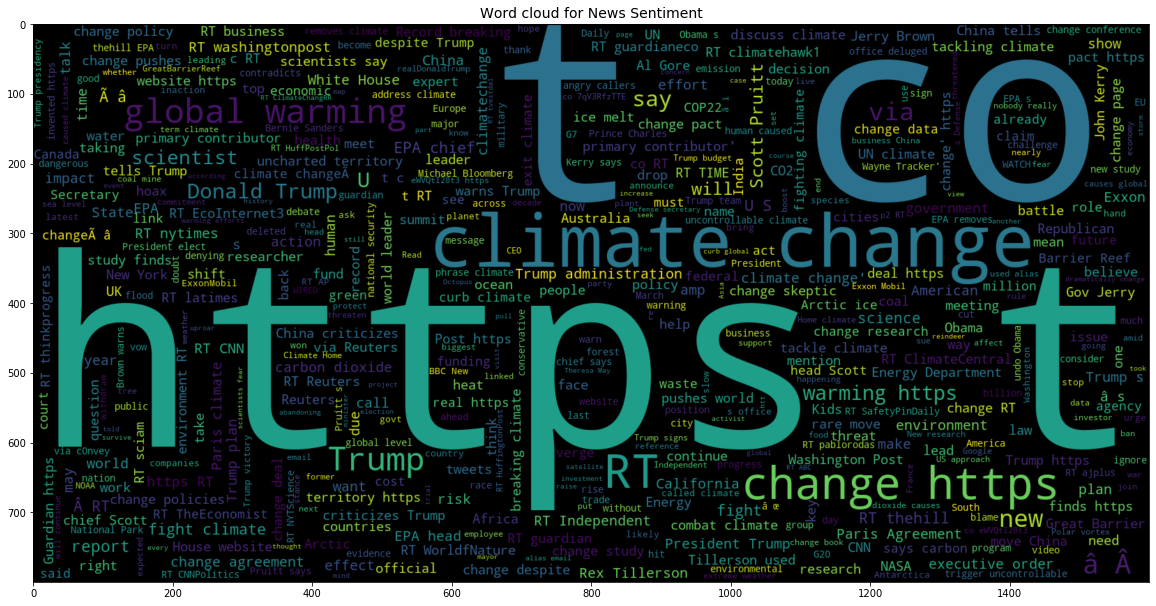

In [18]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(news.message))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for News Sentiment',fontsize=14)

Text(0.5, 1.0, 'Word cloud for News Sentiment')

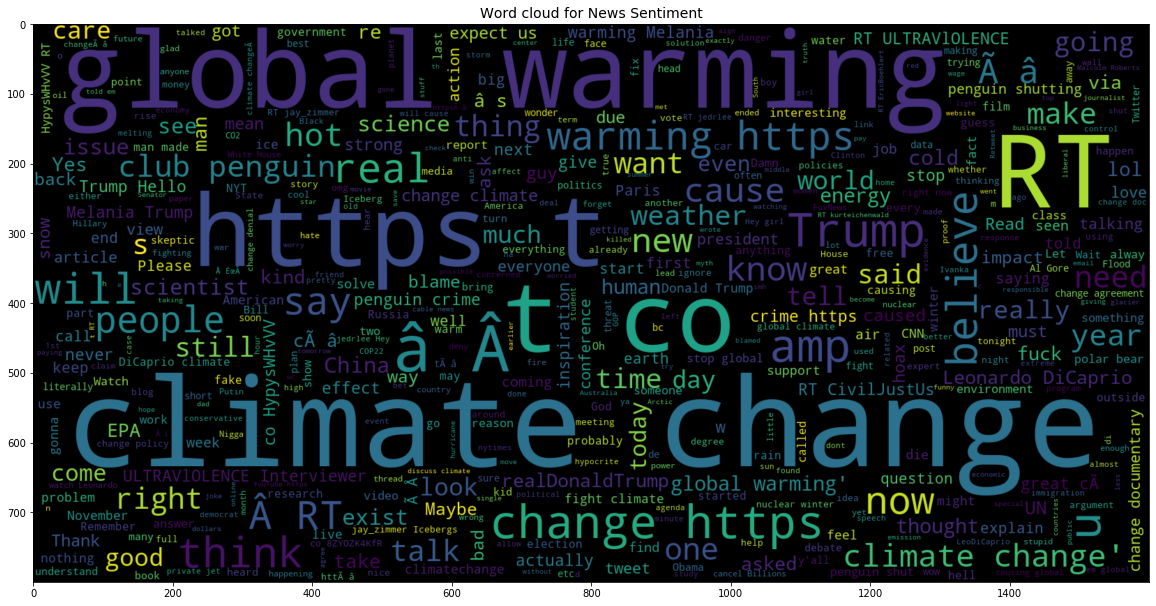

In [19]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(neutral.message))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for News Sentiment',fontsize=14)

Text(0.5, 1.0, 'Word cloud for News Sentiment')

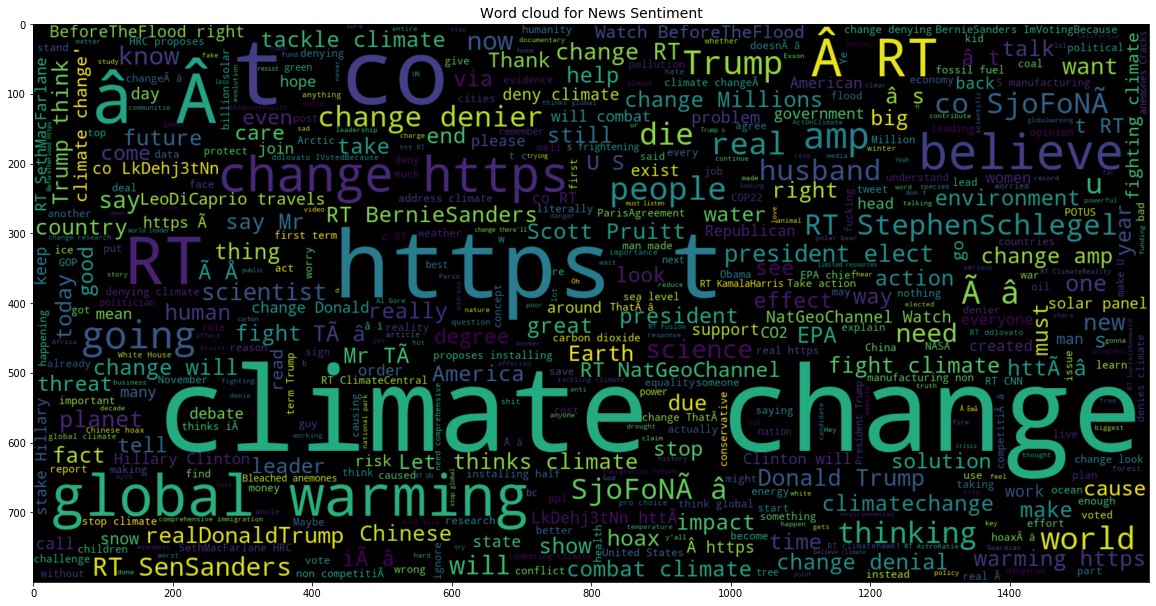

In [20]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(pro.message))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for News Sentiment',fontsize=14)

Text(0.5, 1.0, 'Word cloud for News Sentiment')

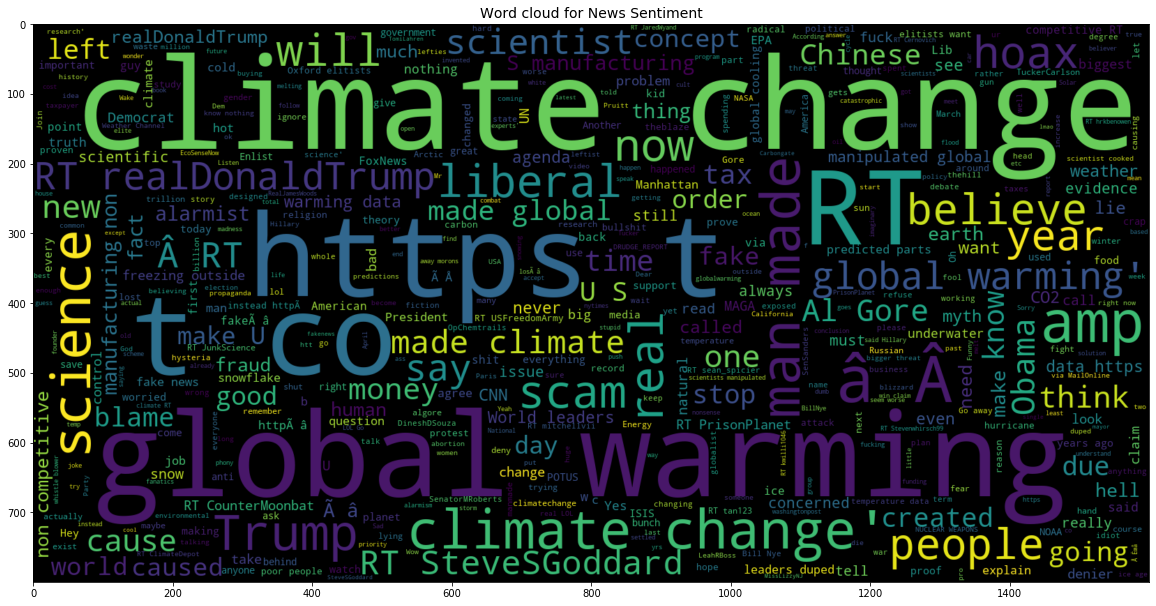

In [21]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(anti.message))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for News Sentiment',fontsize=14)

<a id="four"></a>
## 4. Data Preprocessing
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [43]:
# To set the width of the column to maximum
pd.set_option('max_colwidth', -1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [25]:
df_train['message'][10]

"RT @StephenSchlegel: she's thinking about how she's going to die because your husband doesn't believe in climate change https://t.co/SjoFoNÃ¢â‚¬Â¦"

In [39]:
stop = stopwords.words('english')
porter = PorterStemmer()

lemmatizer = WordNetLemmatizer()

In [82]:
def review_to_words(raw_message):
    # 1. Delete HTML 
    message_text = BeautifulSoup(raw_message, 'html.parser').get_text()
    #letters2 =raw_message.replace('http\S+|www.\S+', '', case=False)
    # 2. Make a space
    
    letters3 = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', message_text)
    letters_only = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))', '', letters3, flags=re.MULTILINE)
    letters = re.sub('[^a-zA-Z]', ' ',  letters_only)
    letters1 = re.sub(r'http', ' ', letters)
    
    #letters_only = re.sub('[^a-zA-Z]', ' ', message_text)
    #letters_only = re.sub('[^a-zA-Z]', ' ', message_text)
    # 3. lower letters
    words = letters1.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stop]
    # 6. lemmitization
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(lemmitize_words))

In [95]:
df_train['cleaned_message'] = df_train['message'].apply(review_to_words)

In [94]:
df_test['cleaned_message2'] = df_test['message'].apply(review_to_words)

In [96]:
df_train.head()

sentiment  \
0  1           
1  1           
2  2           
3  1           
4  1           

                                                                                                                                        message  \
0  PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable   
1  It's not like we lack evidence of anthropogenic global warming                                                                                 
2  RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…   
3  #TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD                                            
4  RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight                     

                                                                            cleaned_message  
0  polyscimajor epa chief think carbon dioxide main cause global warming wait via mashable   
1  like lack evidence anthropogenic global warming                                           
2  rt rawstory researcher say three year act climate change late                             
3  todayinmaker wired pivotal year war climate change                                        
4  rt soynoviodetodas racist sexist climate change denying bigot leading poll electionnight

In [97]:
df_test.head()

message  \
0  Europe will now be looking to China to make sure that it is not alone in fighting climate change… https://t.co/O7T8rCgwDq                     
1  Combine this with the polling of staffers re climate change and womens' rights and you have a fascist state. https://t.co/ifrm7eexpj          
2  The scary, unimpeachable evidence that climate change is already here: https://t.co/yAedqcV9Ki #itstimetochange #climatechange @ZEROCO2_;..   
3  @Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump doesn't believe in climate change at all \nThinks it's s hoax   
4  RT @FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican                                                              

                                                                              cleaned_message  \
0  europe looking china make sure alone fighting climate change                                 
1  combine polling staffer climate change woman right fascist state                             
2  scary unimpeachable evidence climate change already itstimetochange climatechange zeroco     
3  karoli morgfair osborneink dailykos putin got jill trump believe climate change think hoax   
4  rt fakewillmoore female orgasm cause global warming sarcastic republican                     

                                                                             cleaned_message2  
0  europe looking china make sure alone fighting climate change                                
1  combine polling staffer climate change woman right fascist state                            
2  scary unimpeachable evidence climate change already itstimetochange climatechange zeroco    
3  karoli morgfair osborneink dailykos putin got jill trump believe climate change think hoax  
4  rt fakewillmoore female orgasm cause global warming sarcastic republican

## Creating Features

In [100]:
X_feat=df_train['cleaned_message']
y=df_train['sentiment']

In [164]:
X_tfeat = df_test['cleaned_message2']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X_feat, y,stratify=y,test_size=0.2, random_state=0)

In [103]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Bag of Words

In [168]:
count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(X_train)

count_test = count_vectorizer.transform(X_test)
count_test_real = count_vectorizer.transform(X_tfeat)

## Machine Learning Model : Naive Bayes

accuracy:   0.704
Confusion matrix, without normalization


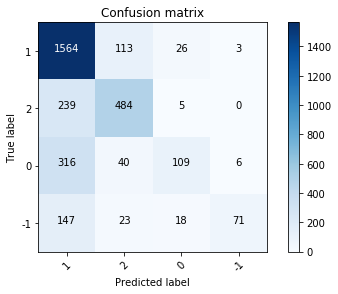

In [112]:
mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=[1,2,0,-1])
plot_confusion_matrix(cm, classes=[1,2,0,-1])
#'news','neutral','pro','anti'

## Machine Learning Model : Naive Bayes : TEST_DATA 

In [182]:
mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred_mnb = mnb.predict(count_test_real)

In [183]:
#The following codes are used to save the expected predictions for kaggle submission
kaggle_mnb = dft[['tweetid']]
kaggle_mnb['sentiment']= pred_mnb
kaggle_mnb.to_csv('sentiment_mnb.csv', index = None)

## Machine Learning Model : Passive Aggressive Classifier

accuracy:   0.691
Confusion matrix, without normalization


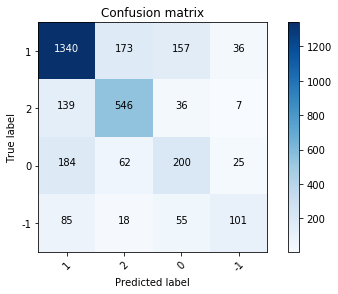

In [118]:
passive = PassiveAggressiveClassifier()
passive.fit(count_train, y_train)
pred = passive.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=[1,2,0,-1])
plot_confusion_matrix(cm, classes=[1,2,0,-1])

## Machine Learning Model : Passive Aggressive Classifier: Test Data

In [181]:
passive = PassiveAggressiveClassifier()
passive.fit(count_train, y_train)
pred_pac = passive.predict(count_test_real)

In [184]:
#The following codes are used to save the expected predictions for kaggle submission
kaggle_file = dft[['tweetid']]
kaggle_file['sentiment']= pred_pac
kaggle_file.to_csv('sentiment_pac.csv', index = None)

### TFIDF

In [172]:


tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.2)
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)
tfidf_test_2_real = tfidf_vectorizer.transform(X_tfeat)

## Machine Learning Model : Naive Bayes

accuracy:   0.631
Confusion matrix, without normalization


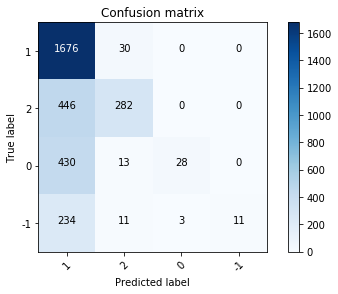

In [131]:
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train_2, y_train)
pred = mnb_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=[1,2,0,-1])
plot_confusion_matrix(cm, classes=[1,2,0,-1])

## Machine Learning Model : Naive Bayes: TEST_DATA

In [180]:
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train_2, y_train)
pred_mnb_tfidf_test = mnb_tf.predict(tfidf_test_2_real)

In [185]:
#The following codes are used to save the expected predictions for kaggle submission
kaggle_file = dft[['tweetid']]
kaggle_file['sentiment']= pred_mnb_tfidf_test
kaggle_file.to_csv('sentiment_mnb_tfidf.csv', index = None)

## Machine Learning Model TFIDF

accuracy:   0.698
Confusion matrix, without normalization


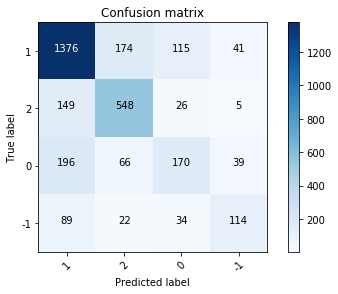

In [309]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

pass_tf = PassiveAggressiveClassifier(C = 0.5, random_state = 5)
pass_tf.fit(tfidf_train, y_train)
pred = pass_tf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=[1,2,0,-1])
plot_confusion_matrix(cm, classes=[1,2,0,-1])


## Machine Learning Model TFIDF:TEST_DATA

In [179]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_real = tfidf_vectorizer.transform(X_tfeat)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train, y_train)
pred_pac_tfidf = pass_tf.predict(tfidf_test_real)

In [186]:
#The following codes are used to save the expected predictions for kaggle submission
kaggle_file = dft[['tweetid']]
kaggle_file['sentiment']= pred_pac_tfidf
kaggle_file.to_csv('sentiment_pac_tfidf.csv', index = None)

## Test 

accuracy:   0.709
Confusion matrix, without normalization


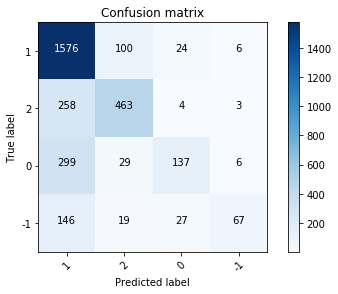

In [322]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=500000, ngram_range=(1, 2))
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)
tfidf_test_real = tfidf_vectorizer.transform(X_tfeat)


logreg = LogisticRegression(multi_class='ovr',solver='lbfgs', max_iter=100)
logreg.fit(tfidf_train, y_train)
y_pred_test_lgr_tf = logreg.predict(tfidf_test)
y_test_real_pred = logreg.predict(tfidf_test_real)
score = metrics.accuracy_score(y_test,y_pred_test_lgr_tf)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, y_pred_test_lgr_tf, labels=[1,2,0,-1])
plot_confusion_matrix(cm, classes=[1,2,0,-1])

accuracy:   0.731
Confusion matrix, without normalization


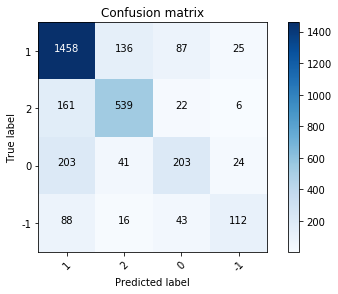

In [324]:
count_vector = CountVectorizer(lowercase=True, stop_words='english', max_features=4000000,ngram_range=(1, 2))
X_train_count_vector = count_vector.fit_transform(X_train.values.astype(str))
X_test_count_vector = count_vector.transform(X_test.values.astype(str))
X_test_real_vector = count_vector.transform(X_tfeat.values.astype(str))





pass_tf = PassiveAggressiveClassifier(C = 0.6, random_state = 10,max_iter=100)
pass_tf.fit(X_train_count_vector, y_train)
pred_t = pass_tf.predict(X_test_count_vector)
score = metrics.accuracy_score(y_test, pred_t)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred_t, labels=[1,2,0,-1])
plot_confusion_matrix(cm, classes=[1,2,0,-1])




## Test 2

accuracy:   0.749
Confusion matrix, without normalization


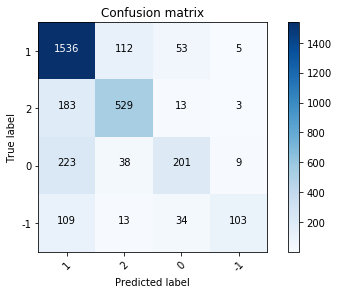

In [326]:
count_vector = CountVectorizer(lowercase=True, stop_words='english', max_features=1000000, ngram_range=(1, 2))
X_train_count_vector = count_vector.fit_transform(X_train.values.astype(str))
X_test_count_vector = count_vector.transform(X_test.values.astype(str))
X_test_real_vector = count_vector.transform(X_tfeat.values.astype(str))



logreg = LogisticRegression(multi_class='ovr',solver='lbfgs', max_iter=1000)
logreg.fit(X_train_count_vector, y_train)
y_pred_test = logreg.predict(X_test_count_vector)
y_test_real_pred = logreg.predict(X_test_real_vector)
score = metrics.accuracy_score(y_test, y_pred_test)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, y_pred_test, labels=[1,2,0,-1])
plot_confusion_matrix(cm, classes=[1,2,0,-1])

## Test 3

In [320]:
#X = dataset.drop(columns=['target'])
#y = dataset['target']

# define categorical and numeric transformers
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImpute
numeric_transformer = Pipeline(steps=[
    ('knnImputer', KNNImputer(n_neighbors=2, weights="uniform")),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

#  dispatch object columns to the categorical_transformer and remaining columns to numerical_transformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, selector(dtype_exclude="object")),
    ('cat', categorical_transformer, selector(dtype_include="object"))
])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
Tx_train, Tx_test, ty_train, ty_test = train_test_split(X_feat, y,stratify=y,test_size=0.2, random_state=0)

clf.fit(Tx_train, ty_train)
print("model score: %.3f" % clf.score(Tx_test, ty_test))

ImportError: cannot import name 'SimpleImpute' from 'sklearn.impute' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\__init__.py)

In [289]:
#The following codes are used to save the expected predictions for kaggle submission
kaggle_file = dft[['tweetid']]
kaggle_file['sentiment']= y_test_real_pred
kaggle_file.to_csv('sentiment_cvlr.csv', index = None)

## TFIDF: Bigrams

In [314]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=50000000, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer2.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer2.transform(X_test)


accuracy:   0.740
Confusion matrix, without normalization
0.74
Classification Report
              precision    recall  f1-score   support

          -1       0.68      0.45      0.54       259
           0       0.64      0.39      0.49       471
           1       0.76      0.88      0.81      1706
           2       0.74      0.74      0.74       728

    accuracy                           0.74      3164
   macro avg       0.71      0.62      0.65      3164
weighted avg       0.73      0.74      0.73      3164



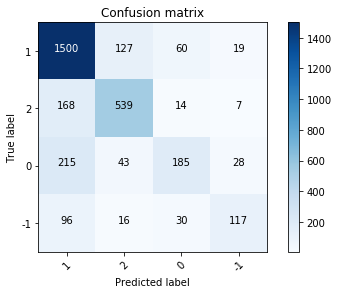

In [315]:
pass_tf = PassiveAggressiveClassifier(C = 0.5, random_state = 5,max_iter=1000)
pass_tf.fit(tfidf_train_2, y_train)
pred = pass_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=[1,2,0,-1])
plot_confusion_matrix(cm, classes=[1,2,0,-1])
# Saving each metric to add to a dictionary for logging
f1 = score
print(round(f1,3))
print('Classification Report')
print(classification_report(y_test, pred))

In [222]:

# Create dictionaries for the data we want to log

params = {"random_state": 7,
          "model_type": "Passive Aggressive ",
          "Text Extractor": "Tfidf Vectorizer",
          "stratify": True
          }
metrics = {"f1": f1
          
           }

In [223]:
# Log our parameters and results
experiment.log_parameters(params)
experiment.log_metrics(metrics)

In [224]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/david-gbenga/edsa-climate-change-belief-analysis-2022/25373b3a0b9e4b248b728d437052215e
COMET INFO:   Metrics:
COMET INFO:     f1 : 0.7392541087231352
COMET INFO:   Parameters:
COMET INFO:     Text Extractor : Tfidf Vectorizer
COMET INFO:     model_type     : Passive Aggressive 
COMET INFO:     random_state   : 7
COMET INFO:     stratify       : True
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     git metadata                 : 1
COMET INFO:     git-patch (uncompressed)     : 1 (16.08 MB)
COMET INFO:     installed pa

## TFIDF: Bigrams:TEST_DATA

In [176]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer2.fit_transform(X_train)
tfidf_test_2_real = tfidf_vectorizer2.transform(X_tfeat)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_2, y_train)
pred_pac_bigrams = pass_tf.predict(tfidf_test_2_real)

In [187]:
#The following codes are used to save the expected predictions for kaggle submission
kaggle_file = dft[['tweetid']]
kaggle_file['sentiment']= pred_pac_bigrams
kaggle_file.to_csv('sentiment_pac_bigrams.csv', index = None)

## TFIDF : Trigrams

accuracy:   0.736
Confusion matrix, without normalization


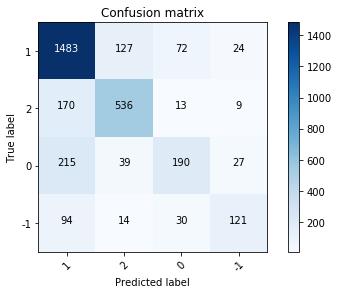

In [162]:
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english', max_df=0.6, ngram_range=(1,2))
tfidf_train_3 = tfidf_vectorizer3.fit_transform(X_train)
tfidf_test_3 = tfidf_vectorizer3.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_3, y_train)
pred = pass_tf.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=[1,2,0,-1])
plot_confusion_matrix(cm, classes=[1,2,0,-1])

## TFIDF : Trigrams:TEST_DATA

In [177]:
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english', max_df=0.6, ngram_range=(1,2))
tfidf_train_3 = tfidf_vectorizer3.fit_transform(X_train)
tfidf_test_3_real = tfidf_vectorizer3.transform(X_tfeat)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_3, y_train)
pred_pac_trigrams = pass_tf.predict(tfidf_test_3_real)

In [188]:
#The following codes are used to save the expected predictions for kaggle submission
kaggle_file = dft[['tweetid']]
kaggle_file['sentiment']= pred_pac_trigrams
kaggle_file.to_csv('sentiment_pac_trigrams.csv', index = None)

## TFIDF : Quadgrams

accuracy:   0.700
Confusion matrix, without normalization


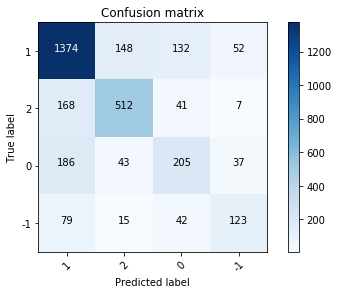

In [159]:
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english', max_df=0.5,min_df=2, ngram_range=(1,2))
tfidf_train_3 = tfidf_vectorizer3.fit_transform(X_train)
tfidf_test_3 = tfidf_vectorizer3.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_3, y_train)
pred = pass_tf.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=[1,2,0,-1])
plot_confusion_matrix(cm, classes=[1,2,0,-1])

## TFIDF : Quadgrams:TEST_DATA

In [178]:
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english', max_df=0.5,min_df=2, ngram_range=(1,2))
tfidf_train_3 = tfidf_vectorizer3.fit_transform(X_train)
tfidf_test_3_real = tfidf_vectorizer3.transform(X_tfeat)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_3, y_train)
pred_pac_quadgrams = pass_tf.predict(tfidf_test_3_real)

In [189]:
#The following codes are used to save the expected predictions for kaggle submission
kaggle_file = dft[['tweetid']]
kaggle_file['sentiment']= pred_pac_quadgrams
kaggle_file.to_csv('sentiment_pac_quadgrams.csv', index = None)

In [ ]:
# Saving each metric to add to a dictionary for logging

f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [ ]:
# Create dictionaries for the data we want to log

params = {"random_state": 7,
          "model_type": "logreg",
          "scaler": "standard scaler",
          "param_grid": str(param_grid),
          "stratify": True
          }
metrics = {"f1": f1,
           "recall": recall,
           "precision": precision
           }

In [ ]:
# Log our parameters and results
experiment.log_parameters(params)
experiment.log_metrics(metrics)

In [ ]:
experiment.end()

Split your data into train and test sets, keep in mind that you need to set a random state for your results to be reproduced!

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data,
    cancer.target,
    stratify=cancer.target,
    random_state=7)

In [ ]:
# Scale your data!

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## GridSearch 

For this example we've used a gridsearch but you may use a model with default parameters or your own parameters too- Just remember to add/remove the neccesary data when you are logging your parameters at the end of the experiment.

The `param_grid` variable contains the 'C' values we want our gridsearch to iterate through.



In [ ]:
logreg = LogisticRegression()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 5, 10, 20, 50, 100]}

In [ ]:
# Training and testing using GridSearch
clf = GridSearchCV(logreg,
                   param_grid=param_grid,
                   cv=10,
                   n_jobs=-1)

clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

## Results

Now that our model has trained, we can have a look at the results- Below is a confusion matrix indicating that at first glance, we have a fairly good model going. We then save the F1 score, Precision, and Recall as individual variables to go into our metric dictionary for logging.

P.S. have a look at the Comet tutorial page for interesting confusion matrix plots.

In [ ]:
print("\nResults\nConfusion matrix \n {}".format(
    confusion_matrix(y_test, y_pred)))


Results
Confusion matrix 
 [[52  1]
 [ 2 88]]


In [ ]:
# Saving each metric to add to a dictionary for logging

f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [ ]:
# Create dictionaries for the data we want to log

params = {"random_state": 7,
          "model_type": "logreg",
          "scaler": "standard scaler",
          "param_grid": str(param_grid),
          "stratify": True
          }
metrics = {"f1": f1,
           "recall": recall,
           "precision": precision
           }

In [ ]:
# Log our parameters and results
experiment.log_parameters(params)
experiment.log_metrics(metrics)

If you're using comet within a jupyter notebook, it's important to end your experiment when you've finished as illustrated below.

In [ ]:
experiment.end()

COMET INFO: ----------------------------
COMET INFO: Comet.ml Experiment Summary:
COMET INFO:   Data:
COMET INFO:     url: https://www.comet.ml/jo-moon/general/96b60794fd8747a084b2a1c0cc015a33
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     f1                      : (0.9832402234636872, 0.9832402234636872)
COMET INFO:     precision               : (0.9887640449438202, 0.9887640449438202)
COMET INFO:     recall                  : (0.9777777777777777, 0.9777777777777777)
COMET INFO:     sys.cpu.percent.01 [31] : (0.9, 10.3)
COMET INFO:     sys.cpu.percent.02 [31] : (0.9, 7.5)
COMET INFO:     sys.cpu.percent.avg [31]: (0.95, 8.9)
COMET INFO:     sys.ram.total [31]      : (13653561344.0, 13653561344.0)
COMET INFO:     sys.ram.used [31]       : (592932864.0, 735928320.0)
COMET INFO: ----------------------------
COMET INFO: Uploading stats to Comet before program termination (may take several seconds)


## Display  

Running `experiment.display()` will show you your experiments comet.ml page inside your notebook as illustrated below. You can do this immediately after an experiment is run, and logged. 

In [ ]:
experiment.display()